In [1]:
import matutil as mt
import matplotlib.pyplot as plt
import numpy as np


#### (a) ¿Cual debería ser el dominio de cada uno de los parámetros α; β y γ ? Explica, en términos cualitativos, cómo sospechas tú que influye el valor de los parámetros en la evolución de la población.

#### Dado que tanto &alpha; como &beta; representan probabilidades, su dominio debe estar entre 0 y 1. En cuanto al dominio del parámetro &gamma;, este debe corresponder a un entero positivo. La influencia de estos parámetros se describe a continuación:

- #### &alpha;: Mientras más alta es la probabilidad de que los adultos sobrevivan, entonces mayor será la cantidad de crías al siguiente año (dado que la cantidad de crías al año siguiente depende tanto de &gamma; como de la cantidad de adultos que sobreviven el año anterior) y por ende mayor será el crecimiento poblacional.  
  
  
- #### &beta;: Analogamente a lo anterior, mientras más alta sea la cantidad de crías que sobreviven en un año n (es decir, mientras más grande es &beta;), mayor será la cantidad de adultos en el año (n + 1) y por tanto mayor será la cantidad de crías en el año (n + 2). Es decir, tiene una influencia similar al parámetro &alpha; pero su impacto en el crecimiento poblacional se ve en el trancurso de 2 años.   
  
  
- #### &gamma;: Mientras más alto es el valor de &gamma;, más crías tiene en promedio cada conejo adulto y por tanto más crece la poblacion (para &alpha; y &beta; dados). Además, mientras más bajo es el valor de &gamma;, entonces mayor es el riesgo de desaparación de la población (ej &gamma; = 1 ó &gamma; = 0).  
  

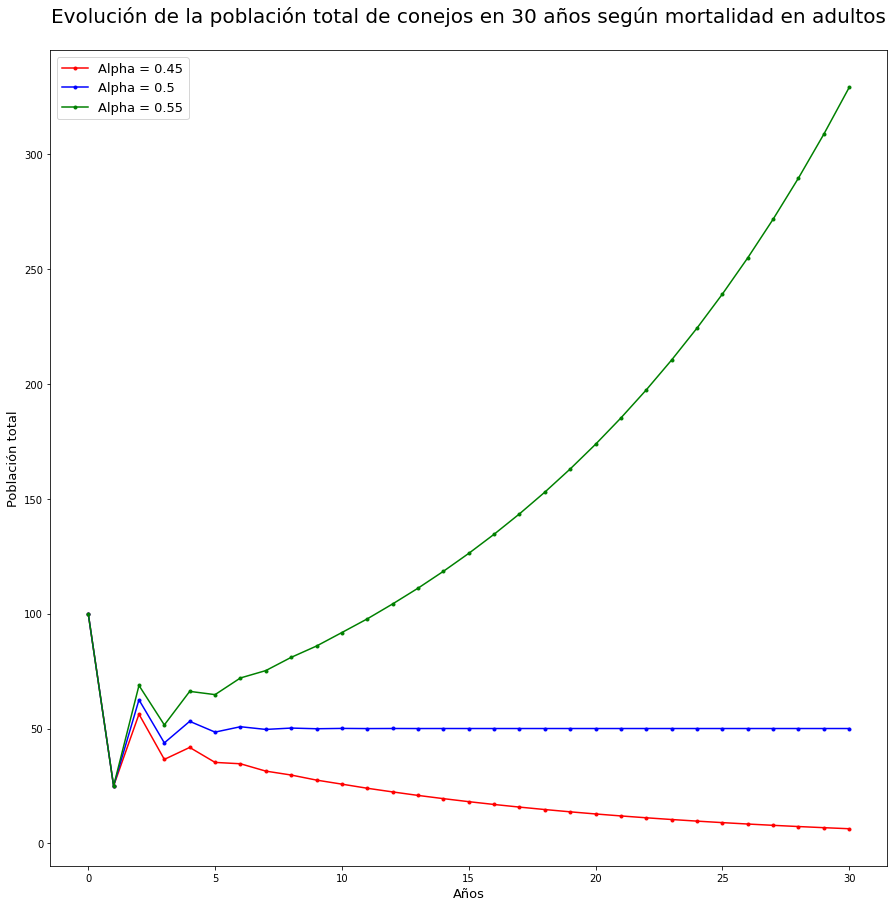

In [2]:
# (b)
#En primer lugar definimos la matriz del sistema.
#Se define inicialmente con strings que indican donde se deben ubicar los parámetros al momento de resolver el sistema.
M = mt.Mat(({1, 2}, {1, 2}), {(1, 1): 'alpha', (1, 2): 'beta', (2, 1): 'alpha * gamma'})
# Primer escenario
beta = 0.25
gamma = 4
alpha = [0.45, 0.5, 0.55]
x_0 = 0
y_0 = 100
dict_resultados = dict()
M[1, 2] = beta
#Iteración por alpha
for alp in alpha:
    #Para cada alpha se genera una lista de resultados
    lista_res = []
    #Se inicializa el vector población
    vector_poblacion = mt.Vec({1, 2}, {1: x_0, 2: y_0})
    #Inicialización de matriz
    M[1, 1] = alp
    M[2, 1] = alp * gamma
    #Se añade la población inicial
    lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Iteración por año
    for ano in range(1, 31):    
        res = M * vector_poblacion     
        #Se aproximan los resultados a enteros (por tratarse de población)   
        vector_poblacion[1] = res[1]
        vector_poblacion[2] = res[2]
        lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Guardar los resultados para cada año (población total)     
    dict_resultados[alp] = [x[0] + x[1] for x in lista_res]
    
#Se genera el gráfico
fig = plt.figure(figsize = (15, 15))
plt.title('Evolución de la población total de conejos en 30 años según mortalidad en adultos\n', fontsize = 20)
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.45], 'r.-', label = 'Alpha = 0.45')
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.5], 'b.-', label = 'Alpha = 0.5')
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.55], 'g.-', label = 'Alpha = 0.55')
plt.legend(fontsize = 13)
plt.ylabel('Población total', fontsize = 13)
plt.xlabel('Años', fontsize = 13) 
plt.show()    

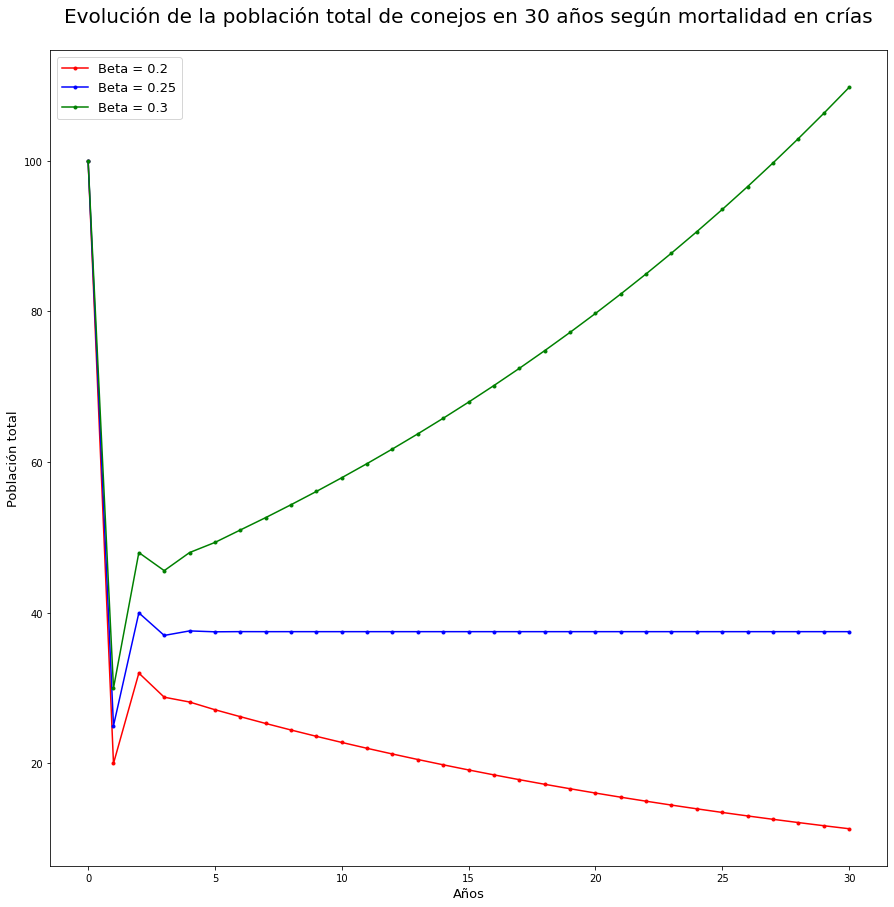

In [3]:
# (c)

# Segundo escenario
betas = [0.2, 0.25, 0.3]
gamma = 1
alpha = 0.8
x_0  = 0
y_0 = 100
dict_resultados = dict()
M[1, 1] = alpha
M[2, 1] = alpha * gamma
#Iteración por beta
for beta in betas:
    #Para cada beta se genera una lista de resultados
    lista_res = []
    #Se inicializa el vector población
    vector_poblacion = mt.Vec({1, 2}, {1: x_0, 2: y_0})
    #Inicialización de matriz
    M[1, 2] = beta
    #Se añade la población inicial
    lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Iteración por año
    for ano in range(1, 31):    
        res = M * vector_poblacion              
        vector_poblacion[1] = res[1]
        vector_poblacion[2] = res[2]
        lista_res.append((vector_poblacion[1], vector_poblacion[2]))  
    #Guardar los resultados para cada año (población total)     
    dict_resultados[beta] = [x[0] + x[1] for x in lista_res]

#Se genera el gráfico
fig = plt.figure(figsize = (15, 15))
plt.title('Evolución de la población total de conejos en 30 años según mortalidad en crías\n', fontsize = 20)
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.2], 'r.-', label = 'Beta = 0.2')
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.25], 'b.-', label = 'Beta = 0.25')
plt.plot(np.linspace(0, 30, 31), dict_resultados[0.3], 'g.-', label = 'Beta = 0.3')
plt.legend(fontsize = 13)
plt.ylabel('Población total', fontsize = 13)
plt.xlabel('Años', fontsize = 13)
plt.show()

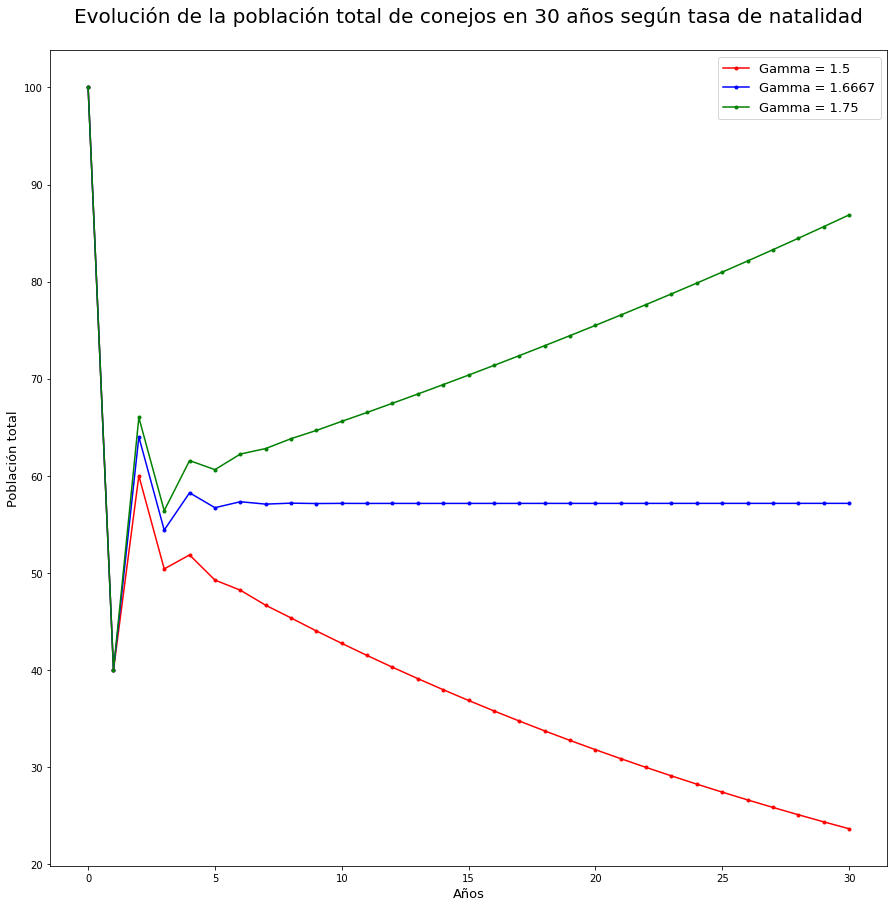

In [4]:
#(d)
# Tercer escenario
beta = 0.4
gammas = [1.5, 1.6667, 1.75]
alpha = 0.6
x_0  = 0
y_0 = 100
dict_resultados = dict()
M[1, 2] = beta
M[1, 1] = alpha
#Iteración por gamma
for gamma in gammas:
    #Para cada gamma se genera una lista de resultados
    lista_res = []
    #Se inicializa el vector población
    vector_poblacion = mt.Vec({1, 2}, {1: x_0, 2: y_0})
    #Se añade la población inicial
    lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Inicialización de matriz
    M[2, 1] = alpha * gamma
    #Iteración por año
    for ano in range(1, 31):    
        res = M * vector_poblacion   
        vector_poblacion[1] = res[1]
        vector_poblacion[2] = res[2]
        lista_res.append((vector_poblacion[1], vector_poblacion[2]))
    #Guardar los resultados para cada año (población total)     
    dict_resultados[gamma] = [x[0] + x[1] for x in lista_res] 
#Se genera el gráfico
fig = plt.figure(figsize = (15, 15))
plt.title('Evolución de la población total de conejos en 30 años según tasa de natalidad\n', fontsize = 20)
plt.plot(np.linspace(0, 30, 31), dict_resultados[1.5], 'r.-', label = 'Gamma = 1.5')
plt.plot(np.linspace(0, 30, 31), dict_resultados[1.6667], 'b.-', label = 'Gamma = 1.6667')
plt.plot(np.linspace(0, 30, 31), dict_resultados[1.75], 'g.-', label = 'Gamma = 1.75')
plt.legend(fontsize = 13)
plt.ylabel('Población total', fontsize = 13)
plt.xlabel('Años', fontsize = 13)     
plt.show()

* #### (e) Encuentre condiciones sobre los parámetros α; β y γ, de forma tal que, a partir de cierto instante:

  * #### 1. La población de conejos se mantenga estable.
  * #### 2. La población de conejos explote.
  * #### 3. La población de conejos desaparezca.

#### Para responder esta pregunta se desarrolla un sistema de ecuaciones de forma manual. En principio se encuentra una condición para (1) y luego se generaliza para los otros casos. Notar que para que la población de conejos se mantenga estable, entonces la natalidad y la mortalidad de la población deben ser equivalentes a partir de un año n (desde el cual la población es estable), donde la natalidad (N) y la mortalidad (M) están dadas por:

<img src="https://latex.codecogs.com/gif.latex?N&space;=&space;\alpha&space;x_{n}&space;\gamma" title="N = \alpha x_{n} \gamma" />

<img src="https://latex.codecogs.com/gif.latex?M&space;=&space;\left(1&space;-&space;\alpha&space;\right&space;)&space;x_{n}&space;&plus;&space;\left(1-\beta&space;\right)&space;y_{n}" title="M = \left(1 - \alpha \right ) x_{n} + \left(1-\beta \right) y_{n}" />

##### Igualando N = M se obtiene:

<img src="https://latex.codecogs.com/gif.latex?\alpha&space;\cdot&space;x_{n}\cdot&space;\gamma&space;=&space;\left&space;(&space;1&space;-&space;\alpha&space;\right&space;)\cdot&space;x_{n}&space;&plus;&space;\left&space;(1&space;-&space;\beta&space;\right)\cdot&space;y_{n}" title="\alpha \cdot x_{n}\cdot \gamma = \left ( 1 - \alpha \right )\cdot x_{n} + \left (1 - \beta \right)\cdot y_{n}" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;\alpha&space;\cdot&space;x_{n}\cdot&space;\gamma&space;-&space;\left&space;(&space;1&space;-&space;\alpha&space;\right&space;)\cdot&space;x_{n}&space;=&space;\left&space;(1&space;-&space;\beta&space;\right)\cdot&space;y_{n}" title="\alpha \cdot x_{n}\cdot \gamma - \left ( 1 - \alpha \right )\cdot x_{n} = \left (1 - \beta \right)\cdot y_{n}" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;x_{n}\&space;\left&space;(&space;\alpha&space;\cdot&space;\gamma&space;-&space;\left(1&space;-&space;\alpha&space;\right&space;)&space;\right&space;)=&space;\left&space;(1&space;-&space;\beta&space;\right)\cdot&space;y_{n}" title="x_{n}\ \left ( \alpha \cdot \gamma - \left(1 - \alpha \right ) \right )= \left (1 - \beta \right)\cdot y_{n}" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;\frac{y_{n}}{x_{n}}&space;=&space;\frac{\alpha&space;\cdot&space;\gamma&space;-&space;\left&space;(1&space;-&space;\alpha&space;\right&space;)}{1&space;-&space;\beta}" title="\frac{y_{n}}{x_{n}} = \frac{\alpha \cdot \gamma - \left (1 - \alpha \right )}{1 - \beta}" />

##### Definiendo k como el valor constante:


<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;k&space;=&space;\frac{\alpha&space;\cdot&space;\gamma&space;-&space;\left&space;(1&space;-&space;\alpha&space;\right&space;)}{1&space;-&space;\beta}" title="k = \frac{\alpha \cdot \gamma - \left (1 - \alpha \right )}{1 - \beta}" />

##### Además, notar que si la población es constante desde un año n en adelante, entonces:

<img src="https://latex.codecogs.com/gif.latex?P_{n}&space;=&space;P_{n&plus;1}" title="P_{n} = P_{n+1}" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;x_{n}&space;&plus;&space;y_{n}&space;=&space;x_{n&plus;1}&space;&plus;&space;y_{n&plus;1}" title="x_{n} + y_{n} = x_{n+1} + y_{n+1}" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;x_{n}&space;&plus;&space;y_{n}&space;-&space;\left(x_{n&plus;1}&space;&plus;&space;y_{n&plus;1}&space;\right&space;)&space;=&space;0" title="x_{n} + y_{n} - \left(x_{n+1} + y_{n+1} \right ) = 0" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;x_{n}&space;&plus;&space;k&space;\cdot&space;x_{n}&space;-&space;\left(x_{n&plus;1}&space;&plus;&space;k&space;\cdot&space;x_{n&plus;1}&space;\right&space;)&space;=&space;0" title="x_{n} + k \cdot x_{n} - \left(x_{n+1} + k \cdot x_{n+1} \right ) = 0" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;x_{n}&space;\left&space;(1&space;&plus;&space;k&space;\right&space;)&space;-&space;x_{n&plus;1}\left(1&space;&plus;&space;k\right&space;)&space;=&space;0" title="x_{n} \left (1 + k \right ) - x_{n+1}\left(1 + k\right ) = 0" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;x_{n}&space;=&space;x_{n&plus;1}" title="x_{n} = x_{n+1}" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;x_{n}&space;=&space;y_{n}&space;\cdot&space;\beta&space;&plus;&space;x_{n}&space;\cdot&space;\alpha" title="\Leftrightarrow x_{n} = y_{n} \cdot \beta + x_{n} \cdot \alpha" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;x_{n}&space;\cdot&space;\left&space;(1&space;-&space;\alpha&space;\right)&space;=&space;y_{n}&space;\cdot&space;\beta" title="\Leftrightarrow x_{n} \cdot \left (1 - \alpha \right) = y_{n} \cdot \beta" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;\frac&space;{y_{n}}{x_{n}}&space;=&space;\frac{1-&space;\alpha}{\beta}" title="\Leftrightarrow \frac {y_{n}}{x_{n}} = \frac{1- \alpha}{\beta}" />

##### Como ya habíamos definido anteriormente:

<img src="https://latex.codecogs.com/gif.latex?\frac&space;{y_{n}}{x_{n}}&space;=&space;k&space;=&space;\frac&space;{\alpha&space;\gamma&space;-&space;\left(1&space;-&space;\alpha&space;\right)}{1&space;-&space;\beta}" title="\frac {y_{n}}{x_{n}} = k = \frac {\alpha \gamma - \left(1 - \alpha \right)}{1 - \beta}" />

#### Luego:

<img src="https://latex.codecogs.com/gif.latex?\Rightarrow&space;\frac{1-&space;\alpha}{\beta}&space;=&space;\frac{\alpha&space;\cdot&space;\gamma&space;-&space;\left(1&space;-&space;\alpha&space;\right&space;)}{1&space;-&space;\beta}" title="\Rightarrow \frac{1- \alpha}{\beta} = \frac{\alpha \cdot \gamma - \left(1 - \alpha \right )}{1 - \beta}" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;\left(1-\alpha&space;\right)&space;\cdot&space;\left(1-\beta&space;\right)&space;=&space;\beta&space;\left(\alpha&space;\cdot&space;\gamma&space;-&space;\left(1&space;-&space;\alpha&space;\right&space;)&space;\right&space;)" title="\Leftrightarrow \left(1-\alpha \right) \cdot \left(1-\beta \right) = \beta \left(\alpha \cdot \gamma - \left(1 - \alpha \right ) \right )" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;1&space;-\beta&space;-&space;\alpha&space;&plus;&space;\alpha&space;\beta&space;=&space;\alpha&space;\beta&space;\gamma&space;-&space;\beta&space;&plus;&space;\alpha&space;\beta" title="\Leftrightarrow 1 -\beta - \alpha + \alpha \beta = \alpha \beta \gamma - \beta + \alpha \beta" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;1&space;-&space;\alpha&space;=&space;\alpha&space;\beta&space;\gamma" title="\Leftrightarrow 1 - \alpha = \alpha \beta \gamma" />

<img src="https://latex.codecogs.com/gif.latex?\Leftrightarrow&space;1&space;=&space;\alpha&space;\beta&space;\gamma&space;&plus;&space;\alpha" title="\Leftrightarrow 1 = \alpha \beta \gamma + \alpha" />

##### En conclusión, la población de conejos se mantendrá estable después de cierto año n si y solo sí se cumple la relación siguiente:

<img src="https://latex.codecogs.com/gif.latex?1&space;=&space;\alpha&space;\beta&space;\gamma&space;&plus;&space;\alpha" title="\Leftrightarrow 1 = \alpha \beta \gamma + \alpha" />

##### Haciendo cálculos similares se puede llegar a que la condición para que el crecimiento de la población sea explosivo es:

<img src="https://latex.codecogs.com/gif.latex?1&space;<&space;\alpha&space;\beta&space;\gamma&space;&plus;&space;\alpha" title="1 > \alpha \beta \gamma + \alpha" />

##### Análogamente, se puede concluir que la condición para que la población de conejos desaparezca después de cierto número de años es:

<img src="https://latex.codecogs.com/gif.latex?1&space;>&space;\alpha&space;\beta&space;\gamma&space;&plus;&space;\alpha" title="1 > \alpha \beta \gamma + \alpha" />

* #### f)   Sea M la matriz definida en (b). Deriva una expresión para x<sub>n</sub> e y<sub>n</sub> utilizando solamente M, n ,x<sub>0</sub> e y<sub>0</sub>.

##### Sabemos por lo desarrollado en el curso, que aplicar sucesivas transformaciones a un vector es equivalente con multiplicar las matrices de las sucesivas transformaciones y luego aplicarla a dicho vector. En base a esto es que se obtiene la siguiente expresión para x<sub>n</sub> e y<sub>n</sub>:

<img src="https://latex.codecogs.com/gif.latex?M^{n}&space;\cdot&space;\binom{x_{0}}{y_{0}}&space;=&space;\binom{x_{n}}{y_{n}}" title="M^{n} \cdot \binom{x_{0}}{y_{0}} = \binom{x_{n}}{y_{n}}" />

* #### g)  A  partir del  resultado  de  (f),  expresa la  cantidad  de  conejos que  tendra  Alicia en  20  anos como una operacion  matricial.  Para  esto,  considera α= 0,5, β= 0,25  y γ= 4,00005  y  calcula  el  valor  de  las entradas de la matriz utilizada (los valores numericos, no en funcion de los parametros).

In [5]:
import mat

In [6]:
#En primer lugar definimos la matriz del sistema.
#Se define inicialmente con strings que indican donde se deben ubicar los parámetros al momento de resolver el sistema.
M = mt.Mat(({1, 2}, {1, 2}), {(1, 1): 0.5 , (1, 2): 0.25, (2, 1): 0.5 * 4.00005 })

def elevadoMatriz(matriz, n):
    matrix = matriz
    for num in range(n):
        matrix = mat.matrix_matrix_mul(matrix, matriz)
    return matrix
Mn = elevadoMatriz(M, 20)
print(Mn)



           1     2
     -------------
 1  |  0.667 0.167
 2  |   1.33 0.333



### Parte 2 (Tortugas)

* #### (i) Encuentra una matriz A tal que X<sub>n+1</sub> = AX<sub>n</sub>.

In [8]:
#En base a las ecuaciones presentadas en el enunciado se define la matriz A como sigue.

A = mt.Mat(({1, 2, 3, 4, 5, 6, 7}, {1, 2, 3, 4, 5, 6, 7}), {(1, 5): 127,  (1, 6): 4, (1, 7): 80, (2, 1): 0.6747, (2, 2): 0.7370, (3, 2): 0.0486, (3, 3): 0.6610,
(4, 3): 0.0147, (4, 4): 0.6907, (5, 4): 0.0518, (6, 5): 0.8091, (7, 6): 0.8091, (7, 7): 0.8089})
print (A)


           1      2      3      4     5     6     7
     ----------------------------------------------
 1  |      0      0      0      0   127     4    80
 2  |  0.675  0.737      0      0     0     0     0
 3  |      0 0.0486  0.661      0     0     0     0
 4  |      0      0 0.0147  0.691     0     0     0
 5  |      0      0      0 0.0518     0     0     0
 6  |      0      0      0      0 0.809     0     0
 7  |      0      0      0      0     0 0.809 0.809



* #### (j) Supongamos que una población de 20 remigrantes llegó a una isla aislada, en la cual no habían tortugas Bobas anteriormente. Grafique el número de tortugas (tanto en cada etapa de desarrollo como el total) que habrían en dicha isla, desde n = 0 a n = 100. Describa lo que ocurre con la población a través del tiempo.

In [59]:
#Iniciar vector población, sabiendo que inicialmente son 20 remigrantes (grupo 6).
vector_tortugas = mt.Vec({1, 2, 3, 4, 5, 6, 7}, {6: 20})
#Lista para guardar los vectores población de tortugas.
res = []
for n in range(101):
    if n == 0:
        res.append(vector_tortugas)
    else:
        vector_tortugas = A * vector_tortugas
        res.append(vector_tortugas)    
#Listas para guardar los resultados de cada grupo etáreo
res_1 = []
res_2 = []
res_3 = []
res_4 = []
res_5 = []
res_6 = []
res_7 = []
#Lista para la población total
res_8 = []
for x in res:
    res_1.append(x[1])
    res_2.append(x[2])
    res_3.append(x[3])
    res_4.append(x[4])
    res_5.append(x[5])
    res_6.append(x[6])
    res_7.append(x[7])
    #Para agregar la población total
    res_8.append(x[1] + x[2] + x[3] + x[4] + x[5] + x[6] + x[7])


Text(0, 0.5, 'Poblacion')

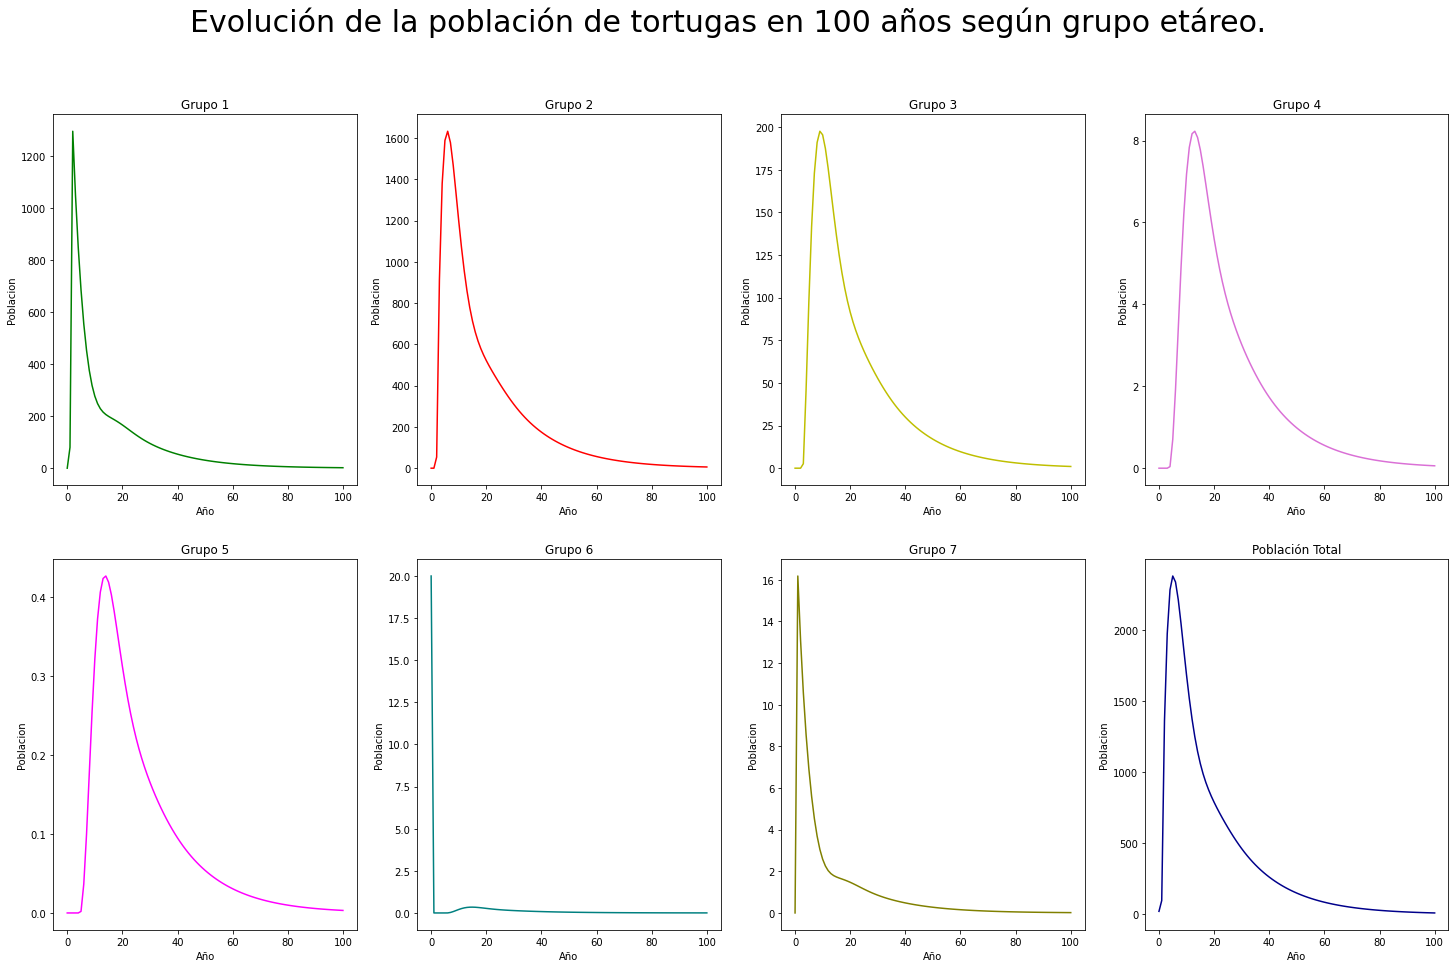

In [72]:
#FIGURA Y AXIS
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize = (25,15))
#TITULO
plt.suptitle('Evolución de la población de tortugas en 100 años según grupo etáreo.', fontsize = 30)
#GRAFICOS
ax1.plot(np.linspace(0, 100, 101), res_1, label = 'Grupo 1', color = 'g')
ax2.plot(np.linspace(0, 100, 101), res_2, label = 'Grupo 2', color = 'r')
ax3.plot(np.linspace(0, 100, 101), res_3, label = 'Grupo 3', color = 'y')
ax4.plot(np.linspace(0, 100, 101), res_4, label = 'Grupo 4', color = 'orchid')
ax5.plot(np.linspace(0, 100, 101), res_5, label = 'Grupo 5', color = 'fuchsia')
ax6.plot(np.linspace(0, 100, 101), res_6, label = 'Grupo 6', color = 'teal')
ax7.plot(np.linspace(0, 100, 101), res_7, label = 'Grupo 7', color = 'olive')
ax8.plot(np.linspace(0, 100, 101), res_8, label = 'Total', color = 'darkblue')
#TITULOS GRAFICOS
ax1.set_title('Grupo 1')
ax2.set_title('Grupo 2')
ax3.set_title('Grupo 3')
ax4.set_title('Grupo 4')
ax5.set_title('Grupo 5')
ax6.set_title('Grupo 6')
ax7.set_title('Grupo 7')
ax8.set_title('Población Total')
#LABELS GRAFICOS
ax1.set_xlabel('Año')
ax2.set_xlabel('Año')
ax3.set_xlabel('Año')
ax4.set_xlabel('Año')
ax5.set_xlabel('Año')
ax6.set_xlabel('Año')
ax7.set_xlabel('Año')
ax8.set_xlabel('Año')
ax1.set_ylabel('Poblacion')
ax2.set_ylabel('Poblacion')
ax3.set_ylabel('Poblacion')
ax4.set_ylabel('Poblacion')
ax5.set_ylabel('Poblacion')
ax6.set_ylabel('Poblacion')
ax7.set_ylabel('Poblacion')
ax8.set_ylabel('Poblacion')


#### Podemos observar que inicialmente la población aumenta pues los remigrantes generan crías. Sin embargo con el transcurso del tiempo pasan varias situaciones en simultáneo:
* #### 1. La población de remigrantes comienza a disminuir y por tanto disminuye notablemente la natalidad.
* #### 2. La población de crías va muriendo según la mortalidad natural. De las crías nacidas en la isla, practicamente todas mueren antes de llegar a ser especímenes del grupo 5.
* #### 3. Después del boost inicial de población por el nacimiento de crías, la población total comienza a disminuir por la baja en la natalidad y también por la mortalidad de las crías. Finalmente la población termina por extinguirse.